## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

#  O que esta perdindo 

Instructions

Data visualization is often a great way to start exploring your data and uncovering insights. In this notebook, you will initiate this process by creating an informative plot of the episode data provided to you. In doing so, you're going to work on several different variables, including the episode number, the viewership, the fan rating, and guest appearances. Here are the requirements needed to pass this project:

    Create a matplotlib scatter plot of the data that contains the following attributes:
        Each episode's episode number plotted along the x-axis
        Each episode's viewership (in millions) plotted along the y-axis
        A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
            Ratings < 0.25 are colored "red"
            Ratings >= 0.25 and < 0.50 are colored "orange"
            Ratings >= 0.50 and < 0.75 are colored "lightgreen"
            Ratings >= 0.75 are colored "darkgreen"
        A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
        A title, reading "Popularity, Quality, and Guest Appearances on the Office"
        An x-axis label reading "Episode Number"
        A y-axis label reading "Viewership (Millions)"

    Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

Important!

To test your matplotlib plot, you will need to initalize a matplotlib.pyplot fig object, which you can do using the code fig = plt.figure() (provided you have imported matplotlib.pyplot as plt). In addition, in order to test it correctly, please make sure to specify your plot (including the type, data, labels, etc) in the same cell as the one you initialize your figure (fig)! You are still free to use other cells to load data, experiment, and answer Question 2.

In addition, if you want to be able to see a larger version of your plot, you can set the figure size parameters using this code (provided again you have imported matplotlib.pyplot as plt):

plt.rcParams['figure.figsize'] = [11, 7]
Bonus Step!

Although it was not taught in Intermediate Python, a useful skill for visualizing different data points is to use a different marker. You can learn more about them via the Matplotlib documentation or via our course Introduction to Data Visualization with Matplotlib. Thus, as a bonus step, try to differentiate guest appearances not just with size, but also with a star!

All other attributes still apply (data on the axes, color scheme, sizes for guest appearances, title, and axis labels).


In [1]:
# Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt

`rcParams` é um dicionário que armazena as configurações padrão dos parâmetros de plotagem no Matplotlib, uma biblioteca de visualização de dados em Python. 

O Matplotlib possui um conjunto de parâmetros de configuração que afetam a aparência de suas visualizações. Por exemplo, as configurações de tamanho da fonte, cor de fundo e tamanho da figura podem ser definidas com os parâmetros padrão. 

`rcParams` armazena esses parâmetros padrão em um dicionário que pode ser acessado e modificado pelo usuário para personalizar a aparência de seus gráficos. 

Por exemplo, para definir o tamanho padrão da fonte em 12 pontos e o tamanho padrão da figura em 8 x 6 polegadas, podemos usar:

```python
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [8.0, 6.0]
```

Dessa forma, todas as visualizações criadas após a execução dessas linhas de código usarão os valores definidos para `font.size` e `figure.figsize`. 

`rcParams` também pode ser usado para armazenar outras configurações de plotagem, como configurações de estilo de linha, tamanho de margem, resolução de imagem e muito mais.

In [2]:
plt.rcParams['figure.figsize'] = [11,7]

In [2]:
# Carregando e monstando informações 
office_df = pd.read_csv('../datasets/office_episodes.csv')
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [4]:
# Criando uma coluna para nos imprimir com nosso criterio 
cols =  []

for ind, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

In [5]:
# caso for episodio especial tamanho da bola seja 250 do contrario 25

sizes = []
for ind, row in office_df.iterrows():
    if row['has_guests'] == True:
        sizes.append(250)
    else:
        sizes.append(25)

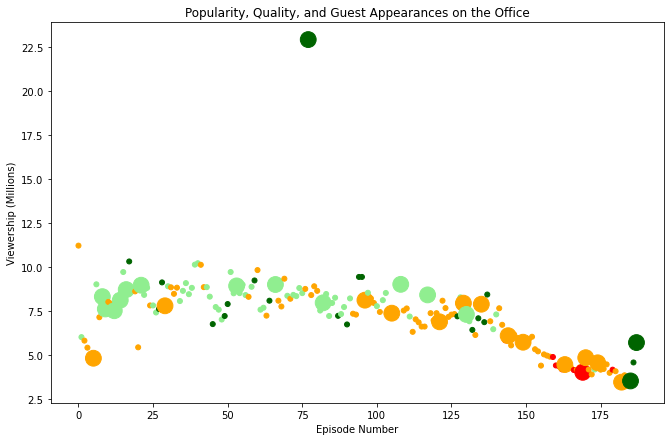

In [8]:
# plotando grafico
fig = plt.figure()

plt.scatter(x=office_df['episode_number'], # eixo x
            y=office_df['viewership_mil'], #eixo y
            c=cols, #cor
            s=sizes # tamanho da bola
           ) 
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.title("Popularity, Quality, and Guest Appearances on the Office")

plt.show()

In [7]:
top_star = 'Jessica Alba'